In [1]:
from google.colab import drive
drive.mount('/content/gdrive/')

Mounted at /content/gdrive/


In [16]:
!unzip -qq "/content/gdrive/MyDrive/손글씨.zip"

#예제 코드

In [17]:
## load the libraries 
from keras.layers import Dense, Input, Conv2D, LSTM, MaxPool2D, UpSampling2D
from sklearn.model_selection import train_test_split
from keras.callbacks import EarlyStopping
from keras.utils import to_categorical
from numpy import argmax, array_equal
import matplotlib.pyplot as plt
from keras.models import Model
from imgaug import augmenters
from random import randint
import pandas as pd
import numpy as np

In [90]:
train = pd.read_csv("/content/fashion-mnist_train.csv")

In [91]:
train

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59996,1,0,0,0,0,0,0,0,0,0,...,73,0,0,0,0,0,0,0,0,0
59997,8,0,0,0,0,0,0,0,0,0,...,160,162,163,135,94,0,0,0,0,0
59998,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [92]:
train_x = train[list(train.columns)[1:]].values
train_y = train['label'].values

In [97]:
train_x.shape

(60000, 784)

In [95]:
train_x = train_x / 255

In [96]:
train_x.shape

(60000, 784)

In [98]:
## create train and validation datasets
train_x, val_x, train_y, val_y = train_test_split(train_x, train_y, test_size=0.2)

In [100]:
train_x.shape

(48000, 784)

In [101]:
## reshape the inputs
train_x = train_x.reshape(-1, 784)
val_x = val_x.reshape(-1, 784)

In [102]:
train_x.shape

(48000, 784)

In [122]:
type(train_x)

numpy.ndarray

In [25]:
input_layer = Input(shape=(784,))

## encoding architecture
encode_layer1 = Dense(1500, activation='relu')(input_layer)
encode_layer2 = Dense(1000, activation='relu')(encode_layer1)
encode_layer3 = Dense(500, activation='relu')(encode_layer2)

latent_view = Dense(10, activation = 'sigmoid')(encode_layer3)

## decoding architecture
decode_layer1 = Dense(500, activation='relu')(latent_view)
decode_layer2 = Dense(1000, activation='relu')(decode_layer1)
decode_layer3 = Dense(1500, activation='relu')(decode_layer2)

In [26]:
output_layer = Dense(784)(decode_layer3)

In [27]:
model = Model(input_layer, output_layer)

In [28]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense_4 (Dense)             (None, 1500)              1177500   
                                                                 
 dense_5 (Dense)             (None, 1000)              1501000   
                                                                 
 dense_6 (Dense)             (None, 500)               500500    
                                                                 
 dense_7 (Dense)             (None, 10)                5010      
                                                                 
 dense_8 (Dense)             (None, 500)               5500      
                                                                 
 dense_9 (Dense)             (None, 1000)              501000

In [29]:
model.compile(optimizer='adam', loss='mse')
early_stopping = EarlyStopping(monitor='val_loss', min_delta=0, patience=10, verbose=1, mode='auto')
model.fit(train_x, train_x, epochs=20, batch_size=2048, validation_data=(val_x, val_x), callbacks=[early_stopping])

Epoch 1/20
24/24 [==============================] - 45s 2s/step - loss: 0.0912 - val_loss: 0.0678
Epoch 2/20
24/24 [==============================] - 40s 2s/step - loss: 0.0629 - val_loss: 0.0537
Epoch 3/20
24/24 [==============================] - 38s 2s/step - loss: 0.0482 - val_loss: 0.0428
Epoch 4/20
24/24 [==============================] - 40s 2s/step - loss: 0.0398 - val_loss: 0.0377
Epoch 5/20
24/24 [==============================] - 37s 2s/step - loss: 0.0369 - val_loss: 0.0359
Epoch 6/20
24/24 [==============================] - 40s 2s/step - loss: 0.0348 - val_loss: 0.0331
Epoch 7/20
24/24 [==============================] - 38s 2s/step - loss: 0.0314 - val_loss: 0.0295
Epoch 8/20
24/24 [==============================] - 39s 2s/step - loss: 0.0285 - val_loss: 0.0270
Epoch 9/20
24/24 [==============================] - 40s 2s/step - loss: 0.0262 - val_loss: 0.0253
Epoch 10/20
24/24 [==============================] - 37s 2s/step - loss: 0.0249 - val_loss: 0.0241
Epoch 11/20
24/24 [

In [30]:
val_x

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.03137255, 0.        ,
        0.        ]])

In [31]:
preds = model.predict(val_x)

375/375 [==============================] - 6s 15ms/step


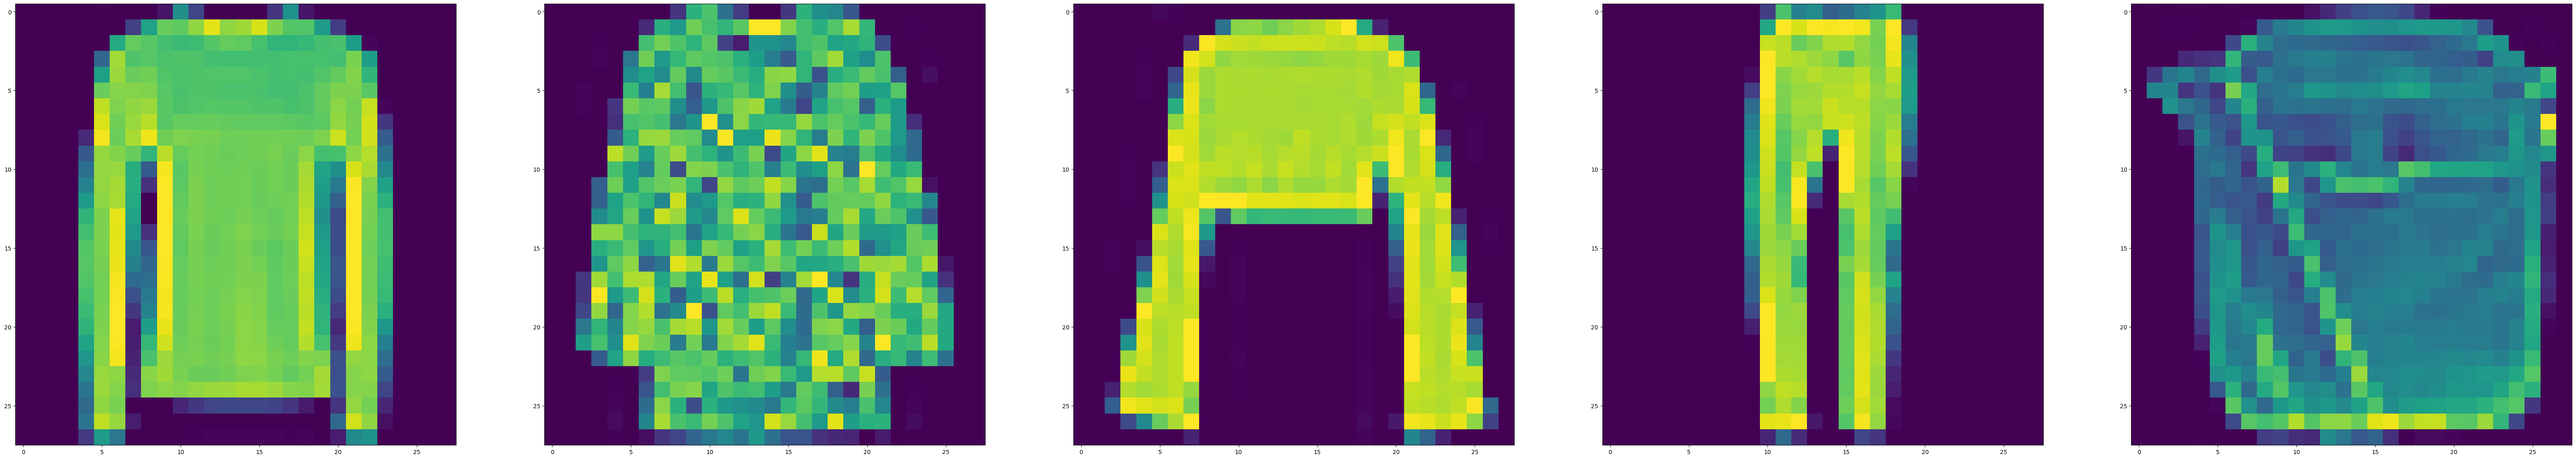

In [32]:
from PIL import Image 
f, ax = plt.subplots(1,5)
f.set_size_inches(80, 40)
for i in range(5):
    ax[i].imshow(val_x[i].reshape(28, 28))
plt.show()

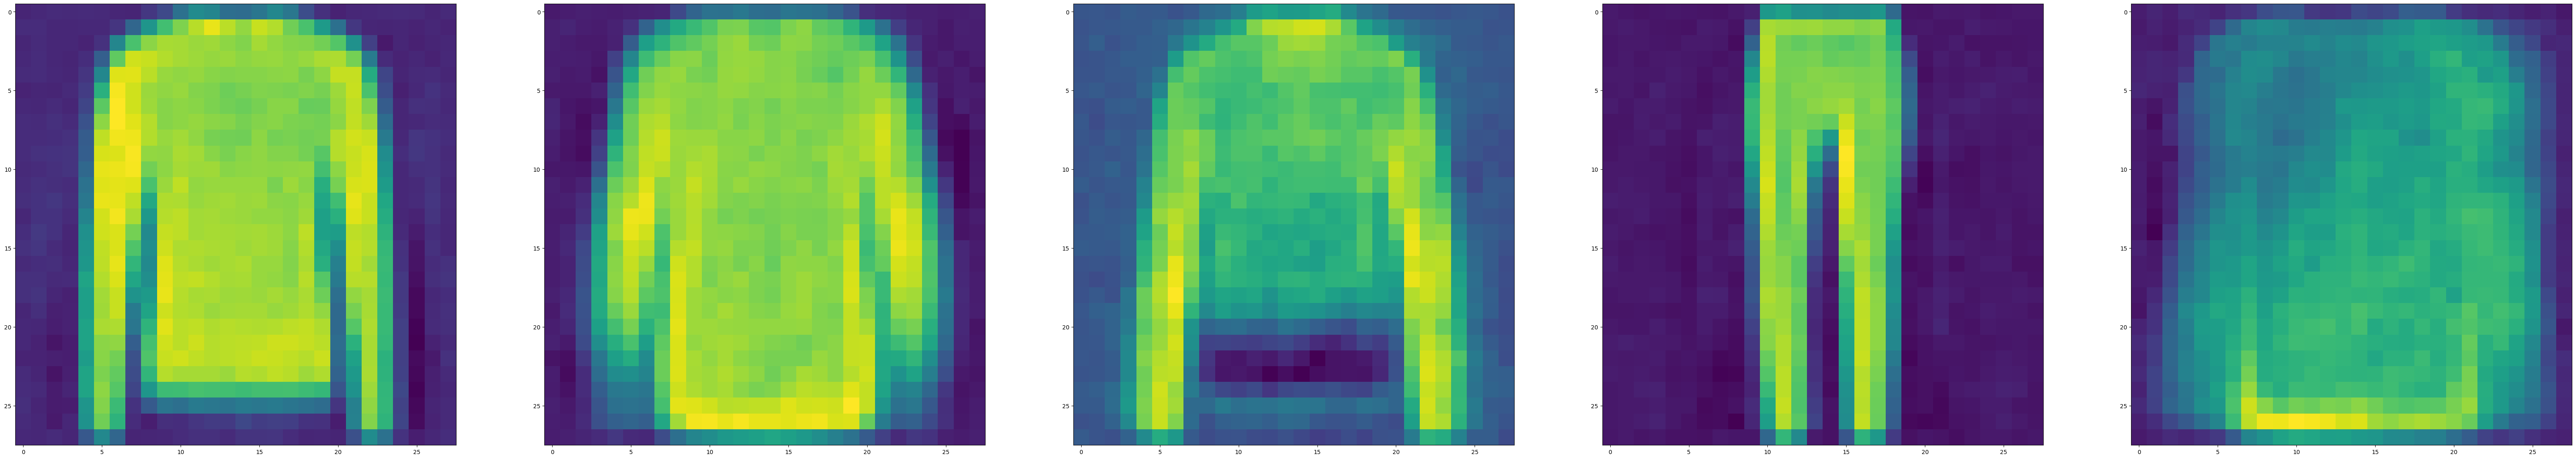

In [36]:
f, ax = plt.subplots(1,5)
f.set_size_inches(80, 40)
for i in range(5):
    ax[i].imshow(preds[i].reshape(28, 28))
plt.show()

In [38]:
# Lets add sample noise - Salt and Pepper
noise = augmenters.SaltAndPepper(0.1)
seq_object = augmenters.Sequential([noise])

In [39]:
train_x_n = seq_object.augment_images(train_x * 255) / 255
val_x_n = seq_object.augment_images(val_x * 255) / 255

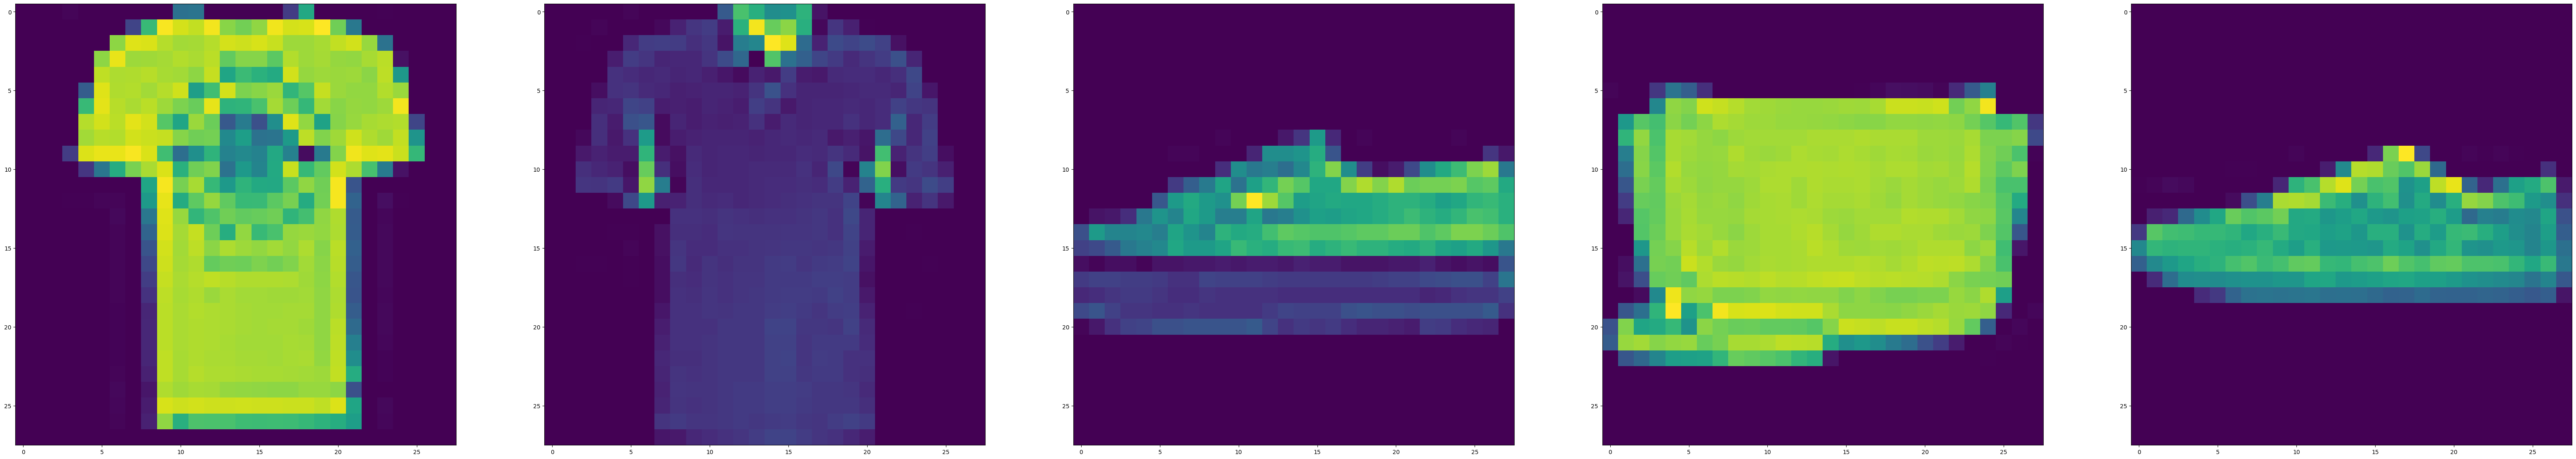

In [40]:
f, ax = plt.subplots(1,5)
f.set_size_inches(80, 40)
for i in range(5,10):
    ax[i-5].imshow(train_x[i].reshape(28, 28))
plt.show()

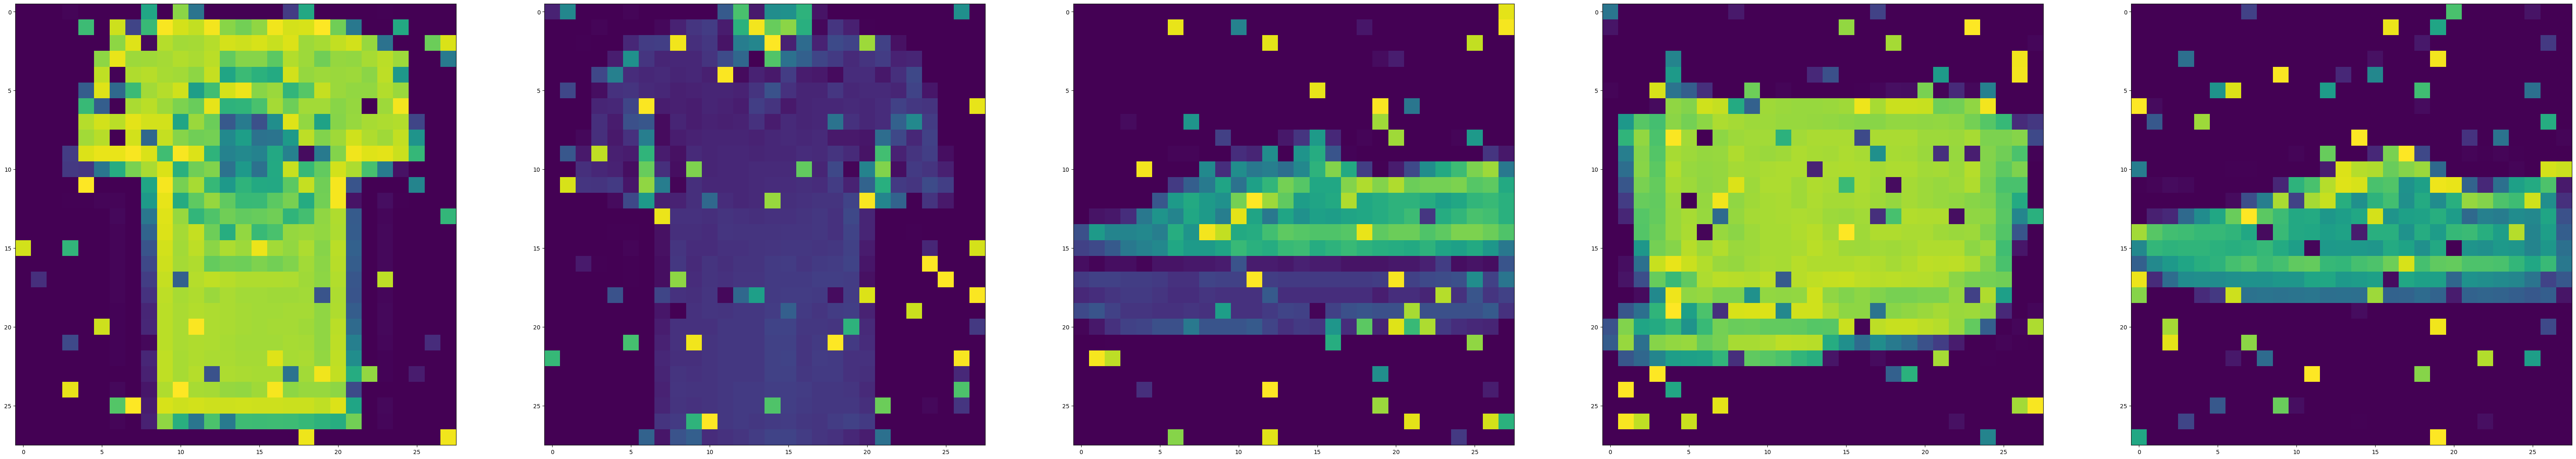

In [41]:
f, ax = plt.subplots(1,5)
f.set_size_inches(80, 40)
for i in range(5,10):
    ax[i-5].imshow(train_x_n[i].reshape(28, 28))
plt.show()